# Data Analysis Project: Comparing Stocks and Cryptocurrencies

### Overview
This project involves analysing and comparing the performance of traditional stock prices and cryptocurrencies. By merging datasets from Yahoo Finance, we aim to uncover insights into how these two asset classes differ in terms of trends, volatility, and performance.  

The analysis will be structured into five key steps:  
1. **Crawling a Real-World Dataset**: Fetching stock and cryptocurrency price data from Yahoo Finance.  
2. **Performing Data Preparation and Cleaning**: Preparing the datasets by handling missing data, inconsistencies, and enriching the data.  
3. **Exploratory Analysis**: Visualising and summarising key metrics to better understand the data.  
4. **Formulating and Answering a Question**: Investigating how cryptocurrency performance compares to traditional stocks.  
5. **Summary and Conclusion**: Summarising findings and suggesting potential future analyses.  


## Step 1: Crawling Real-World Datasets

- **Objective**:  
  Extract two datasets—one for traditional stock prices and another for cryptocurrency prices. These datasets will serve as the foundation for comparing the performance of cryptocurrencies to traditional stocks.

- **Reason for Choosing Stock and Cryptocurrency Data**:  
  - Stock price data from companies like Apple and Tesla are well-structured and reflect traditional market trends.  
  - Cryptocurrency data, such as Bitcoin and Ethereum, represent a growing alternative asset class with unique market behaviors.  
  - Combining these datasets allows for an insightful comparison of their volatility, trends, and relationships, aligning with financial data analysis.

- **Data Sources**:  
  - Stock prices: Extracted from Yahoo Finance using the `yfinance` library.  
  - Cryptocurrency prices: Extracted from Yahoo Finance using the `yfinance` library, as it supports cryptocurrency tickers like `BTC-USD` and `ETH-USD`.

- **Plan for This Step**:  
  1. Fetch stock price data for selected companies (e.g., Apple and Tesla).  
  2. Fetch cryptocurrency price data for Bitcoin and Ethereum.  
  3. Save the data as CSV files for use in subsequent steps.


### Step 1.1: Downloading Necessary Libraries

- **Objective**:  
  Ensure that all required Python libraries are installed and functional for this project.

- **Plan**:  
  - Use `pip` to install the following libraries:  
    - `yfinance`: To fetch stock and cryptocurrency price data.  
    - `pandas`: For data manipulation and cleaning.  
    - `matplotlib`: For data visualization in later steps.  
  - Verify the installation by importing the libraries and printing confirmation messages.


In [ ]:

!pip install yfinance pandas matplotlib

# Import required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Verify the libraries are installed and functional
print("Libraries installed and imported successfully.")


### Step 1.2: Fetching Stock Price Data

- **Objective**:  
  Extract historical stock price data for 3 selected companies (Apple, Tesla, and Amazon) to prepare for further analysis.

- **Plan**:  
  1. Define the stock tickers (`AAPL`, `TSLA`, `AMZN`) and specify the time range (e.g., January 2020 to January 2023).  
  2. Use the `yfinance` library to download data for each company.  
  3. Extract the following variables for each stock:  
     - `Date`: Trading date.  
     - `Close`: Closing price.  
     - `Volume`: Number of shares traded.  
     - `High`/`Low`: Daily high and low prices.  
     - `Adj Close`: Adjusted closing price.  
  4. Save the data for each company as separate CSV files.



In [16]:

# Define stock tickers and date range
stock_tickers = ["AAPL", "TSLA", "AMZN"]  # Selected stocks
start_date = "2020-01-01"
end_date = "2023-01-01"

# Fetch and save the stock data
for ticker in stock_tickers:
    # Download data from Yahoo Finance
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    # Save data to CSV
    filename = f"{ticker}_stock_data.csv"
    stock_data.to_csv(filename)
    print(f"Saved data for {ticker} to {filename}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Saved data for AAPL to AAPL_stock_data.csv
Saved data for TSLA to TSLA_stock_data.csv
Saved data for AMZN to AMZN_stock_data.csv


### Step 1.3: Fetching Cryptocurrency Data

- **Objective**:  
  Extract historical price data for 2 selected cryptocurrencies (Bitcoin and Ethereum) to compare their performance with stocks.

- **Plan**:  
  1. Define the cryptocurrency tickers (`BTC-USD`, `ETH-USD`) and specify the same time range as the stocks.  
  2. Use the `yfinance` library to download data for each cryptocurrency.  
  3. Extract the following variables:  
     - `Date`: Trading date.  
     - `Close`: Closing price.  
     - `Volume`: Number of units traded.  
     - `High`/`Low`: Daily high and low prices.  
     - `Adj Close`: Adjusted closing price (where applicable).  
  4. Save the data for each cryptocurrency as separate CSV files.



In [17]:
# Define cryptocurrency tickers and date range
crypto_tickers = ["BTC-USD", "ETH-USD"]  # Selected cryptocurrencies
start_date = "2020-01-01"
end_date = "2023-01-01"

# Fetch and save the cryptocurrency data
for ticker in crypto_tickers:
    # Download data from Yahoo Finance
    crypto_data = yf.download(ticker, start=start_date, end=end_date)
    # Save data to CSV
    filename = f"{ticker}_crypto_data.csv"
    crypto_data.to_csv(filename)
    print(f"Saved data for {ticker} to {filename}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Saved data for BTC-USD to BTC-USD_crypto_data.csv
Saved data for ETH-USD to ETH-USD_crypto_data.csv


### Step 1.4: Merging Stock and Cryptocurrency Datasets

- **Objective**:  
  Combine the datasets for 3 selected stocks (Apple, Tesla, Amazon) and 2 cryptocurrencies (Bitcoin, Ethereum) into a single dataset for analysis.

- **Plan**:  
  1. Load the data for each stock and cryptocurrency from the previously saved CSV files.  
  2. Extract the following variables for each asset:
     - `Date`: Trading date (key for merging).  
     - `Close`: Closing price.  
     - `High`/`Low`: Daily high and low prices.  
     - `Volume`: Number of units traded.  
     - `Adj Close`: Adjusted closing price.  
  3. Use the ticker name to rename the columns (e.g., `AAPL_Close`, `BTC-USD_Volume`).  
  4. Merge the datasets on the `Date` column.  
  5. Save the merged dataset to a new CSV file.



In [18]:
# List of file names for 3 selected stocks and 2 cryptocurrencies
file_names = [
    "AAPL_stock_data.csv", "TSLA_stock_data.csv", "AMZN_stock_data.csv",
    "BTC-USD_crypto_data.csv", "ETH-USD_crypto_data.csv"
]

# Load the data, extract relevant columns, and process headers
data_frames = []
for file_name in file_names:
    # Load the full file to extract the ticker (second row)
    full_df = pd.read_csv(file_name, header=0)
    # Extract the ticker from the second row
    ticker = full_df.iloc[0]["Close"]
    # Load data, skip rows 2 and 3, and use the first row as header
    df = pd.read_csv(file_name, header=0, skiprows=[1, 2])
    # Rename 'Price' to 'Date'
    df.rename(columns={"Price": "Date"}, inplace=True)
    # Rename columns to include the ticker name for clarity
    df.rename(
        columns={
            "Close": f"{ticker}_Close",
            "Volume": f"{ticker}_Volume",
            "High": f"{ticker}_High",
            "Low": f"{ticker}_Low",
            "Adj Close": f"{ticker}_Adj_Close"
        },
        inplace=True,
    )
    # Keep only the relevant columns
    df = df[["Date", f"{ticker}_Close", f"{ticker}_Volume", f"{ticker}_High", f"{ticker}_Low", f"{ticker}_Adj_Close"]]
    data_frames.append(df)

# Merge all datasets on the 'Date' column
merged_data = data_frames[0]
for df in data_frames[1:]:
    merged_data = pd.merge(merged_data, df, on="Date", how="inner")

# Save the merged dataset to a new CSV file
merged_data.to_csv("merged_stock_crypto_data_reduced.csv", index=False)
print("Merged dataset saved as 'merged_stock_crypto_data_reduced.csv'")

Merged dataset saved as 'merged_stock_crypto_data_reduced.csv'


## Step 2: Data Preparation and Cleaning

- **Objective**:  
  Prepare the merged dataset for analysis by ensuring data quality, consistency, and enriching it with relevant features.

- **Plan for This Step**:  
  1. Load the dataset into a Pandas DataFrame.  
  2. Handle missing data to ensure there are no gaps that could affect analysis.  
  3. Identify and address outliers or inconsistencies to maintain accuracy in analysis.  
  4. Parse dates and create additional columns or features (e.g., daily returns and volatility) to enrich the dataset.  

Each of these steps will be executed and explained in detail in the following subsections.


### Step 2.1: Load the Dataset

- **Objective**:  
  Import the merged dataset into a Pandas DataFrame to begin the cleaning and preparation process.

- **Steps**:  
  1. Use the Pandas library to load the dataset from the saved CSV file (`merged_stock_crypto_data_reduced.csv`).
  2. Verify that the dataset has been loaded correctly by:
     - Displaying the first few rows.
     - Printing the column names.
     - Checking the shape of the dataset (rows and columns).


In [19]:
# Load the dataset
df = pd.read_csv("merged_stock_crypto_data_reduced.csv")

# Verify the dataset
print("First few rows of the dataset:")
print(df.head())  # Display the first few rows

print("\nColumn names in the dataset:")
print(df.columns)  # Display column names

print("\nShape of the dataset:")
print(df.shape)  # Display the number of rows and columns

First few rows of the dataset:
         Date  AAPL_Close  AAPL_Volume  AAPL_High   AAPL_Low  AAPL_Adj_Close  \
0  2020-01-02   75.087502    135480400  75.150002  73.797501       72.796021   
1  2020-01-03   74.357498    146322800  75.144997  74.125000       72.088287   
2  2020-01-06   74.949997    118387200  74.989998  73.187500       72.662720   
3  2020-01-07   74.597504    108872000  75.224998  74.370003       72.320961   
4  2020-01-08   75.797501    132079200  76.110001  74.290001       73.484352   

   TSLA_Close  TSLA_Volume  TSLA_High   TSLA_Low  ...  BTC-USD_Close  \
0   28.684000    142981500  28.713333  28.114000  ...    6985.470215   
1   29.534000    266677500  30.266666  29.128000  ...    7344.884277   
2   30.102667    151995000  30.104000  29.333332  ...    7769.219238   
3   31.270666    268231500  31.441999  30.224001  ...    8163.692383   
4   32.809334    467164500  33.232666  31.215334  ...    8079.862793   

   BTC-USD_Volume  BTC-USD_High  BTC-USD_Low  BTC-USD_A

### Step 2.2: Handle Missing Data

- **Objective**:  
  Identify and handle missing values in the dataset to ensure it is complete and ready for analysis.

- **Steps**:  
  1. Check for missing values in the dataset to identify any gaps.  
  2. Handle missing values using linear interpolation to maintain the continuity of trends.  
  3. Verify that all missing values have been addressed.


In [20]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)

# Handle missing values using linear interpolation
df.interpolate(method="linear", inplace=True)

# Verify that missing values have been handled
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)


Missing values before handling:
 Date                 0
AAPL_Close           0
AAPL_Volume          0
AAPL_High            0
AAPL_Low             0
AAPL_Adj_Close       0
TSLA_Close           0
TSLA_Volume          0
TSLA_High            0
TSLA_Low             0
TSLA_Adj_Close       0
AMZN_Close           0
AMZN_Volume          0
AMZN_High            0
AMZN_Low             0
AMZN_Adj_Close       0
BTC-USD_Close        0
BTC-USD_Volume       0
BTC-USD_High         0
BTC-USD_Low          0
BTC-USD_Adj_Close    0
ETH-USD_Close        0
ETH-USD_Volume       0
ETH-USD_High         0
ETH-USD_Low          0
ETH-USD_Adj_Close    0
dtype: int64

Missing values after handling:
 Date                 0
AAPL_Close           0
AAPL_Volume          0
AAPL_High            0
AAPL_Low             0
AAPL_Adj_Close       0
TSLA_Close           0
TSLA_Volume          0
TSLA_High            0
TSLA_Low             0
TSLA_Adj_Close       0
AMZN_Close           0
AMZN_Volume          0
AMZN_High            0
A

### Step 2.3: Handle Outliers

- **Objective**:  
  Detect and handle outliers in relevant columns to ensure accurate analysis and remove any extreme values that could skew the results.

- **Steps**:  
  1. Use the Interquartile Range (IQR) method to identify outliers in the `Volume` columns.  
  2. Remove rows containing extreme values in the identified columns.  
  3. Verify that the dataset has been updated by checking its shape and summary statistics.


In [21]:
# Define a function to remove outliers using the IQR method
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the function to 'Volume' columns
for col in df.columns:
    if "Volume" in col:
        print(f"Handling outliers for {col}...")
        initial_shape = df.shape
        df = remove_outliers(df, col)
        print(f"Rows removed for {col}: {initial_shape[0] - df.shape[0]}")

# Verify the updated dataset
print("\nShape of the dataset after handling outliers:", df.shape)


Handling outliers for AAPL_Volume...
Rows removed for AAPL_Volume: 41
Handling outliers for TSLA_Volume...
Rows removed for TSLA_Volume: 56
Handling outliers for AMZN_Volume...
Rows removed for AMZN_Volume: 25
Handling outliers for BTC-USD_Volume...
Rows removed for BTC-USD_Volume: 32
Handling outliers for ETH-USD_Volume...
Rows removed for ETH-USD_Volume: 32

Shape of the dataset after handling outliers: (570, 26)


### Step 2.4: Enrich the Data

- **Objective**:  
  Parse the `Date` column into a proper datetime format and create additional features to enhance the dataset for analysis.

- **Steps**:  
  1. Convert the `Date` column into a datetime format for easier manipulation and analysis.  
  2. Create the following new features:
     - **Daily Returns**: Percentage change in `Close` prices for each asset. This measures daily performance and helps analyse trends.  
     - **Volatility**: The difference between `High` and `Low` prices for each asset. This indicates the daily price fluctuation, which is useful for analysing risk.  
  3. Verify the dataset to ensure the new features have been added correctly.


In [24]:
# Parse the 'Date' column into datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create daily returns for each asset
for col in df.columns:
    if "Close" in col:
        df[f"{col}_Daily_Return"] = df[col].pct_change()  # Percentage change

# Create volatility for each asset
for col in df.columns:
    if "High" in col:
        asset_name = col.split("_")[0]  # Extract asset name (e.g., "AAPL" or "BTC-USD")
        df[f"{asset_name}_Volatility"] = df[f"{asset_name}_High"] - df[f"{asset_name}_Low"]

# Verify the newly created columns
print("Newly created columns:")
print([col for col in df.columns if "Daily_Return" in col or "Volatility" in col])

# Display the first few rows to confirm the new features
print("\nFirst few rows with new features:")
print(df.head())


Newly created columns:
['AAPL_Close_Daily_Return', 'AAPL_Adj_Close_Daily_Return', 'TSLA_Close_Daily_Return', 'TSLA_Adj_Close_Daily_Return', 'AMZN_Close_Daily_Return', 'AMZN_Adj_Close_Daily_Return', 'BTC-USD_Close_Daily_Return', 'BTC-USD_Adj_Close_Daily_Return', 'ETH-USD_Close_Daily_Return', 'ETH-USD_Adj_Close_Daily_Return', 'AAPL_Volatility', 'TSLA_Volatility', 'AMZN_Volatility', 'BTC-USD_Volatility', 'ETH-USD_Volatility']

First few rows with new features:
         Date  AAPL_Close  AAPL_Volume  AAPL_High   AAPL_Low  AAPL_Adj_Close  \
0  2020-01-02   75.087502    135480400  75.150002  73.797501       72.796021   
2  2020-01-06   74.949997    118387200  74.989998  73.187500       72.662720   
6  2020-01-10   77.582497    140644800  78.167503  77.062500       75.214874   
11 2020-01-17   79.682503    137816400  79.684998  78.750000       77.250809   
15 2020-01-24   79.577499    146537600  80.832497  79.379997       77.148987   

    TSLA_Close  TSLA_Volume  TSLA_High   TSLA_Low  ...  \

### Step 2.5: Finalising the Cleaned Dataset

- **Objective**:  
  Save the cleaned and enriched dataset to a new CSV file with only the essential variables required for analysis.

- **Steps**:  
  1. Identify and retain only the essential columns:
     - **Date**: For time-based analysis.
     - **Adj Close**: Represents adjusted closing prices for performance analysis.
     - **Volume**: For analysing trading activity.
     - **Volatility**: To understand daily price ranges.
     - **Adj_Close_Daily_Return**: For calculating daily performance.
  2. Filter the DataFrame to exclude unnecessary columns.
  3. Save the cleaned dataset to a CSV file (`final_cleaned_enriched_data.csv`) for future exploratory and statistical analysis.
  4. Confirm the dataset's structure by printing its shape and column names.

- **Expected Outcome**:  
  A simplified and enriched dataset that is ready for exploratory analysis and subsequent steps in the project.


In [25]:
# Define the essential columns to keep
columns_to_keep = ["Date"]  # Always keep the Date column

# Add relevant columns for each asset
for col in df.columns:
    if "Adj_Close" in col or "Volume" in col or "Volatility" in col or "Adj_Close_Daily_Return" in col:
        columns_to_keep.append(col)

# Filter the DataFrame to keep only the selected columns
df_cleaned = df[columns_to_keep]

# Save the cleaned and simplified dataset to a new CSV file
df_cleaned.to_csv("final_cleaned_enriched_data.csv", index=False)

# Confirm the changes
print("Final dataset saved as 'final_cleaned_enriched_data.csv'")
print("Shape of the final dataset:", df_cleaned.shape)
print("Columns in the final dataset:")
print(df_cleaned.columns)


Final dataset saved as 'final_cleaned_enriched_data.csv'
Shape of the final dataset: (570, 21)
Columns in the final dataset:
Index(['Date', 'AAPL_Volume', 'AAPL_Adj_Close', 'TSLA_Volume',
       'TSLA_Adj_Close', 'AMZN_Volume', 'AMZN_Adj_Close', 'BTC-USD_Volume',
       'BTC-USD_Adj_Close', 'ETH-USD_Volume', 'ETH-USD_Adj_Close',
       'AAPL_Adj_Close_Daily_Return', 'TSLA_Adj_Close_Daily_Return',
       'AMZN_Adj_Close_Daily_Return', 'BTC-USD_Adj_Close_Daily_Return',
       'ETH-USD_Adj_Close_Daily_Return', 'AAPL_Volatility', 'TSLA_Volatility',
       'AMZN_Volatility', 'BTC-USD_Volatility', 'ETH-USD_Volatility'],
      dtype='object')


### Step 2.6: Rearranging Columns

- **Objective**:  
  Rearrange the columns in the dataset to group variables logically by asset and ensure consistent order for easier analysis.

- **Steps**:  
  1. Begin with the `Date` column, as it is the key for time-based analysis.  
  2. Group metrics (`Adj Close`, `Volume`, `Volatility`, `Adj_Close_Daily_Return`) for each asset:
     - Ensure that all metrics for a single asset (e.g., `AAPL`) are placed together.  
     - Repeat the grouping for all assets in the dataset (e.g., stocks like `TSLA`, `AMZN`, and cryptocurrencies like `BTC-USD` and `ETH-USD`).
  3. Verify the new column order to ensure consistency.  
  4. Save the reordered dataset to a new CSV file (`reordered_cleaned_data.csv`) for future use.

- **Expected Outcome**:  
  A cleaned and enriched dataset with a consistent column order, grouped logically by asset and variable type.


In [26]:
# Start with the Date column
ordered_columns = ["Date"]

# Dynamically group columns by asset and metric
assets = ["AAPL", "TSLA", "AMZN", "BTC-USD", "ETH-USD"]  # List of assets in your dataset
metrics = ["Adj_Close", "Volume", "Volatility", "Adj_Close_Daily_Return"]

# Add columns for each asset and metric
for asset in assets:
    for metric in metrics:
        column_name = f"{asset}_{metric}"
        if column_name in df_cleaned.columns:
            ordered_columns.append(column_name)

# Rearrange the columns
df_cleaned = df_cleaned[ordered_columns]

# Verify the new column order
print("New column order:")
print(df_cleaned.columns)

# Save the reordered dataset to a new CSV file
df_cleaned.to_csv("reordered_cleaned_data.csv", index=False)
print("Reordered dataset saved as 'reordered_cleaned_data.csv'")


New column order:
Index(['Date', 'AAPL_Adj_Close', 'AAPL_Volume', 'AAPL_Volatility',
       'AAPL_Adj_Close_Daily_Return', 'TSLA_Adj_Close', 'TSLA_Volume',
       'TSLA_Volatility', 'TSLA_Adj_Close_Daily_Return', 'AMZN_Adj_Close',
       'AMZN_Volume', 'AMZN_Volatility', 'AMZN_Adj_Close_Daily_Return',
       'BTC-USD_Adj_Close', 'BTC-USD_Volume', 'BTC-USD_Volatility',
       'BTC-USD_Adj_Close_Daily_Return', 'ETH-USD_Adj_Close', 'ETH-USD_Volume',
       'ETH-USD_Volatility', 'ETH-USD_Adj_Close_Daily_Return'],
      dtype='object')
Reordered dataset saved as 'reordered_cleaned_data.csv'


### Step 2.7: Grouping Data for Stocks and Cryptocurrencies

- **Objective**:  
  Group the assets into two categories—**Traditional Stocks** and **Cryptocurrencies**—to simplify analysis and focus on broader trends and differences between these two asset classes.

- **Grouping Logic**:  
  - **Traditional Stocks**:
    - Includes `AAPL` (Apple), `TSLA` (Tesla), and `AMZN` (Amazon).
  - **Cryptocurrencies**:
    - Includes `BTC-USD` (Bitcoin) and `ETH-USD` (Ethereum).

- **Metrics for Grouping**:  
  For each group, the following metrics will be aggregated:
  1. **Average Daily Returns** (`Adj_Close_Daily_Return`): To assess performance.
  2. **Average Volatility** (`Volatility`): To measure risk and price fluctuations.
  3. **Total Trading Volume** (`Volume`): To analyse trading activity.

- **Purpose of Grouping**:  
  Aggregating metrics by category allows for:
  1. Easier comparison of stocks vs. cryptocurrencies.
  2. Highlighting trends and insights that are consistent within each group.
  3. Simplifying the analysis without losing meaningful information.


In [27]:
# Load the cleaned and enriched dataset
df = pd.read_csv("reordered_cleaned_data.csv")  # Replace with the correct file name if different

# Define asset groups
stocks = ["AAPL", "TSLA", "AMZN"]
cryptos = ["BTC-USD", "ETH-USD"]

# Create DataFrames for grouped metrics
grouped_metrics = {"Traditional Stocks": {}, "Cryptocurrencies": {}}

for group, assets in [("Traditional Stocks", stocks), ("Cryptocurrencies", cryptos)]:
    # Aggregate metrics
    grouped_metrics[group]["Avg_Return"] = df[[f"{asset}_Adj_Close_Daily_Return" for asset in assets]].mean(axis=1)
    grouped_metrics[group]["Avg_Volatility"] = df[[f"{asset}_Volatility" for asset in assets]].mean(axis=1)
    grouped_metrics[group]["Total_Volume"] = df[[f"{asset}_Volume" for asset in assets]].sum(axis=1)

# Convert to a grouped DataFrame for analysis
grouped_df = pd.DataFrame({
    "Date": df["Date"],
    "Stocks_Avg_Return": grouped_metrics["Traditional Stocks"]["Avg_Return"],
    "Cryptos_Avg_Return": grouped_metrics["Cryptocurrencies"]["Avg_Return"],
    "Stocks_Avg_Volatility": grouped_metrics["Traditional Stocks"]["Avg_Volatility"],
    "Cryptos_Avg_Volatility": grouped_metrics["Cryptocurrencies"]["Avg_Volatility"],
    "Stocks_Total_Volume": grouped_metrics["Traditional Stocks"]["Total_Volume"],
    "Cryptos_Total_Volume": grouped_metrics["Cryptocurrencies"]["Total_Volume"]
})

# Preview the grouped DataFrame
print("Grouped Data Preview:")
print(grouped_df.head())

# Save grouped data for further analysis
grouped_df.to_csv("grouped_data.csv", index=False)
print("Grouped dataset saved as 'grouped_data.csv'")


Grouped Data Preview:
         Date  Stocks_Avg_Return  Cryptos_Avg_Return  Stocks_Avg_Volatility  \
0  2020-01-02                NaN                 NaN               1.214945   
1  2020-01-06           0.016731            0.122396               1.585889   
2  2020-01-10           0.027897            0.024392               1.067113   
3  2020-01-17           0.028311            0.139818               1.079498   
4  2020-01-24           0.034479           -0.049708               1.712219   

   Cryptos_Avg_Volatility  Stocks_Total_Volume  Cryptos_Total_Volume  
0              140.375191            359041900           28834792721  
1              190.411385            351618200           32370008719  
2              224.213112            392111300           37799400047  
3              145.549637            422198900           51369231146  
4              127.692940            437165600           35055584188  
Grouped dataset saved as 'grouped_data.csv'


### Step 2.8: Handling Missing Values in Daily Returns

- **Objective**:  
  Address the `NaN` values present in the daily return columns caused by the lack of previous data points for the first row.

- **Reason for This Step**:  
  The first row of `Avg_Return` columns (e.g., `Stocks_Avg_Return`, `Cryptos_Avg_Return`) contains `NaN` because no previous data exists to calculate the percentage change. Handling these values ensures accurate and consistent analysis without introducing errors.

- **Approach**:  
  1. Identify rows with missing values in the daily return columns.
  2. Drop the first row from the dataset, as it cannot have valid daily return data.
  3. Verify that no missing values remain in the dataset.

- **Outcome**:  
  The dataset will no longer have `NaN` values in the daily return columns, ensuring it is clean and ready for analysis.


In [28]:
# Check for missing values in the grouped dataset
print("Missing values before handling:")
print(grouped_df.isna().sum())

# Drop the first row with NaN values in daily returns
grouped_df = grouped_df.dropna()

# Verify the updated dataset
print("Missing values after handling:")
print(grouped_df.isna().sum())

# Save the cleaned grouped dataset
grouped_df.to_csv("cleaned_grouped_data.csv", index=False)
print("Cleaned grouped dataset saved as 'cleaned_grouped_data.csv'")


Missing values before handling:
Date                      0
Stocks_Avg_Return         1
Cryptos_Avg_Return        1
Stocks_Avg_Volatility     0
Cryptos_Avg_Volatility    0
Stocks_Total_Volume       0
Cryptos_Total_Volume      0
dtype: int64
Missing values after handling:
Date                      0
Stocks_Avg_Return         0
Cryptos_Avg_Return        0
Stocks_Avg_Volatility     0
Cryptos_Avg_Volatility    0
Stocks_Total_Volume       0
Cryptos_Total_Volume      0
dtype: int64
Cleaned grouped dataset saved as 'cleaned_grouped_data.csv'


## Step 3: Exploratory Analysis

This section explores key metrics of the dataset, focusing on summarising and visualising data to uncover patterns, trends, and relationships. The insights gained here will guide deeper analysis in subsequent steps.

### Overview
- **Objective**:  
  Gain insights into the dataset by summarising and visualising key metrics for stocks and cryptocurrencies. This step helps identify patterns, trends, and relationships within the data to inform deeper analysis.

- **Plan**:  
  1. Compute summary statistics for key metrics, including:
     - Average returns (`Stocks_Avg_Return` and `Cryptos_Avg_Return`)
     - Average volatility (`Stocks_Avg_Volatility` and `Cryptos_Avg_Volatility`)
     - Total trading volume (`Stocks_Total_Volume` and `Cryptos_Total_Volume`)
  2. Visualise the distribution of returns and volatility to compare risk and performance between stocks and cryptocurrencies.
  3. Use scatter plots to explore relationships between metrics, such as:
     - Returns vs. volatility
     - Trading volume vs. returns
  4. Create time-series plots to examine how returns, volatility, and trading volumes vary over time.

- **Purpose**:  
  This section provides a comprehensive overview of the data, highlighting key differences between stocks and cryptocurrencies. It lays the groundwork for answering more complex questions in the next step.


### 3.1: Performance Comparison

- **Purpose**:  
  To compare the performance of stocks and cryptocurrencies in terms of their average daily returns.

- **Subsections**:  
  1. **Time-Series Plot of Average Returns (Smoothed)**:  
     Highlights trends in performance over time for stocks and cryptocurrencies.
  2. **Boxplot of Distribution of Returns**:  
     Compares the spread, central tendency, and outliers of returns for the two asset classes.



#### 3.1.1: Time-Series Plot of Average Returns (Smoothed)

- **Objective**:  
  Visualise and compare trends in the average daily returns of stocks and cryptocurrencies over time.

- **Plot Description**:  
  A smoothed time-series line plot showing the average daily returns for stocks and cryptocurrencies. Smoothing is applied to highlight long-term trends and minimise short-term noise.

- **Insights to Extract**:  
  - Identify periods of outperformance for either asset class.
  - Highlight any significant divergences or convergences between stocks and cryptocurrencies.


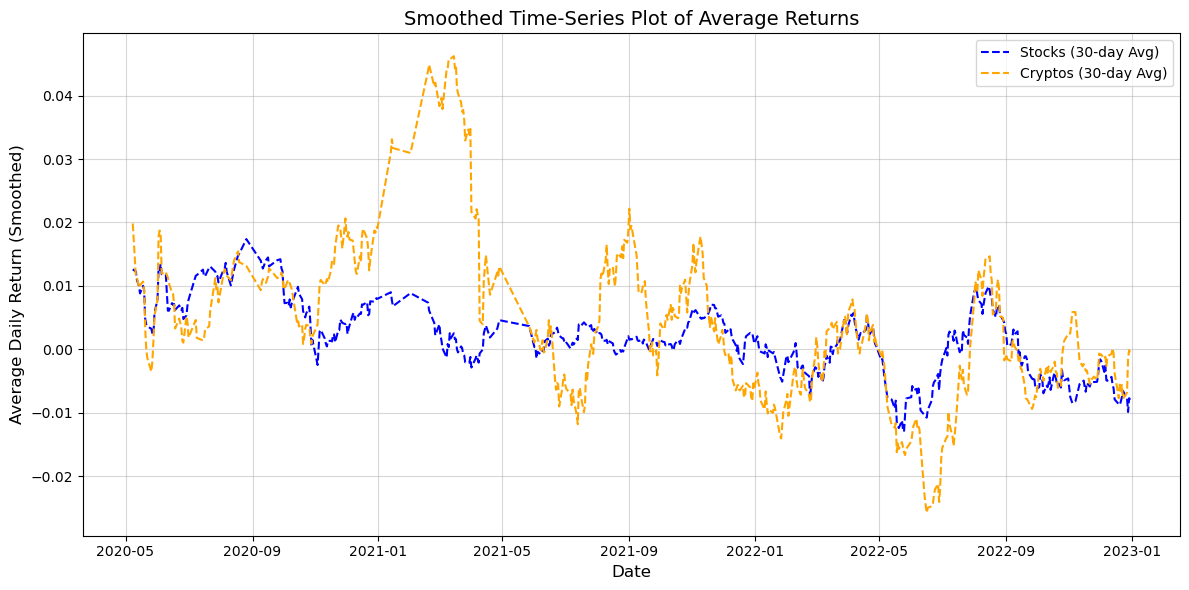

In [50]:

# Load the dataset
file_path = 'cleaned_grouped_data.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Apply rolling averages for smoothing
data['Stocks_Avg_Return_Roll'] = data['Stocks_Avg_Return'].rolling(window=30).mean()
data['Cryptos_Avg_Return_Roll'] = data['Cryptos_Avg_Return'].rolling(window=30).mean()

# Create smoothed time-series plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Stocks_Avg_Return_Roll'], label='Stocks (30-day Avg)', color='blue', linestyle='--')
plt.plot(data['Date'], data['Cryptos_Avg_Return_Roll'], label='Cryptos (30-day Avg)', color='orange', linestyle='--')

# Add labels, title, and legend
plt.title('Smoothed Time-Series Plot of Average Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Daily Return (Smoothed)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()



#### 3.1.2: Boxplot of Distribution of Returns

- **Objective**:  
  Compare the spread, central tendency, and outliers in the daily returns of stocks and cryptocurrencies.

- **Plot Description**:  
  A boxplot comparing the distributions of average daily returns for stocks and cryptocurrencies. This highlights variability, medians, and potential outliers.

- **Insights to Extract**:  
  - Assess whether cryptocurrencies have higher variability in returns compared to stocks.
  - Compare medians and detect outliers for each asset class.



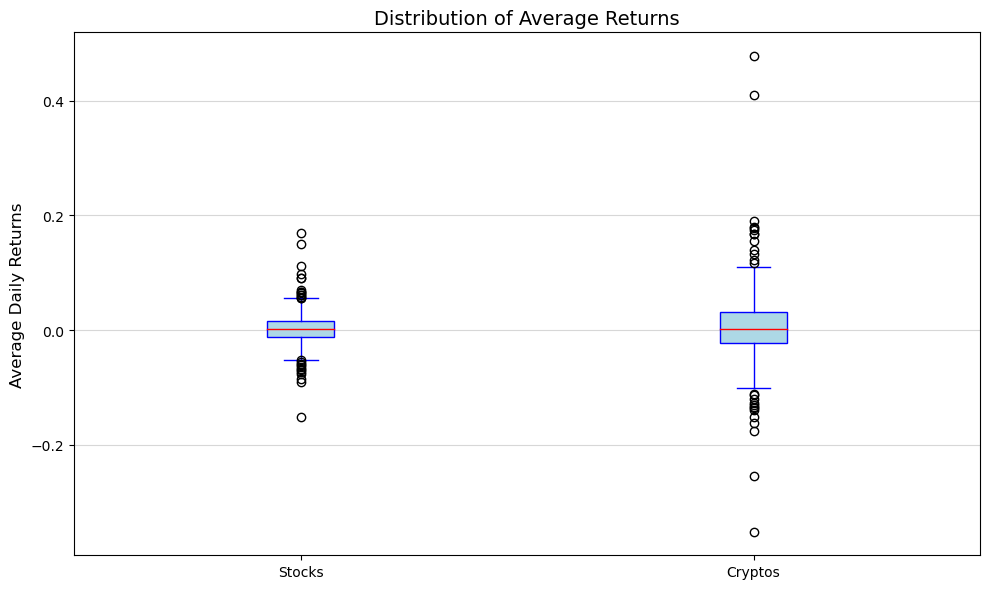

In [51]:
# Prepare data for the boxplot
returns_data = [data['Stocks_Avg_Return'].dropna(), data['Cryptos_Avg_Return'].dropna()]

# Create boxplot
plt.figure(figsize=(10, 6))
box = plt.boxplot(
    returns_data,
    labels=['Stocks', 'Cryptos'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue')
)

# Add labels and title
plt.title('Distribution of Average Returns', fontsize=14)
plt.ylabel('Average Daily Returns', fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


### 3.2: Risk Analysis

- **Purpose**:  
  To assess the risk profiles of stocks and cryptocurrencies by analysing their volatility.

- **Subsections**:  
  1. **Time-Series Plot of Volatility**:  
     Highlights trends and fluctuations in daily volatility over time for both asset classes.
  2. **Histogram of Volatility Distribution**:  
     Provides a snapshot of the variability in volatility for stocks and cryptocurrencies.


#### 3.2.1: Time-Series Plot of Volatility

- **Objective**:  
  Visualise and compare the daily volatility trends of stocks and cryptocurrencies over time.

- **Plot Description**:  
  A line plot showing daily volatility for stocks and cryptocurrencies. If the scales are vastly different, separate plots or dual axes will be used for clarity.

- **Insights to Extract**:  
  - Identify which asset class experiences higher volatility over time.
  - Highlight periods of extreme volatility spikes.


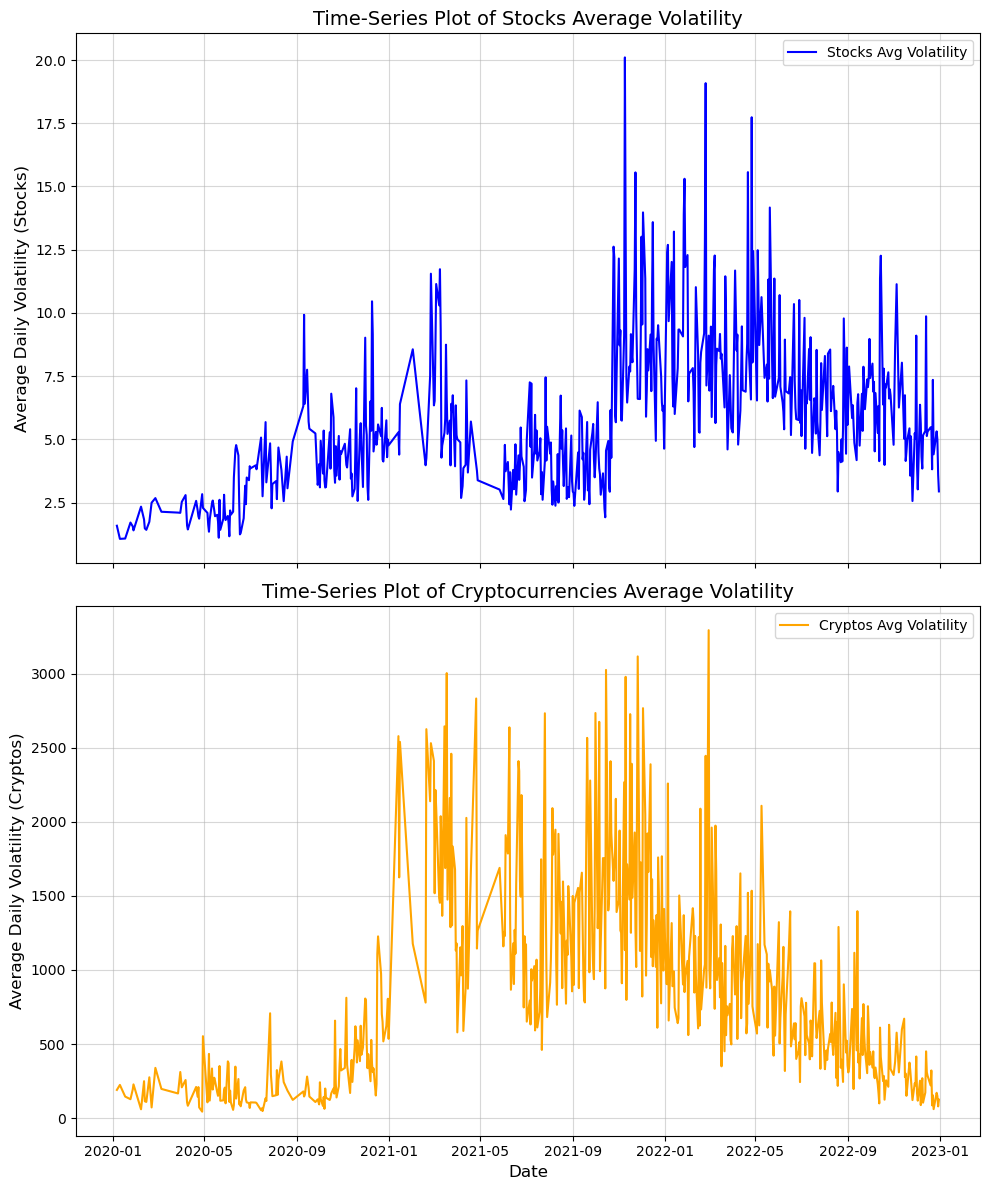

In [52]:
# Create separate plots for stocks and cryptocurrencies if scales differ
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot for stocks
ax1.plot(data['Date'], data['Stocks_Avg_Volatility'], label='Stocks Avg Volatility', color='blue')
ax1.set_title('Time-Series Plot of Stocks Average Volatility', fontsize=14)
ax1.set_ylabel('Average Daily Volatility (Stocks)', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(alpha=0.5)

# Plot for cryptocurrencies
ax2.plot(data['Date'], data['Cryptos_Avg_Volatility'], label='Cryptos Avg Volatility', color='orange')
ax2.set_title('Time-Series Plot of Cryptocurrencies Average Volatility', fontsize=14)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Average Daily Volatility (Cryptos)', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()



#### 3.2.2: Histogram of Volatility Distribution

- **Objective**:  
  Compare the distributions of daily volatility for stocks and cryptocurrencies to assess variability and risk profiles.

- **Plot Description**:  
  Two histograms (one for stocks and one for cryptocurrencies) displaying the frequency distribution of daily volatility values.

- **Insights to Extract**:  
  - Identify which asset class exhibits higher variability in volatility.
  - Observe the presence of outliers or extreme values in the distribution.


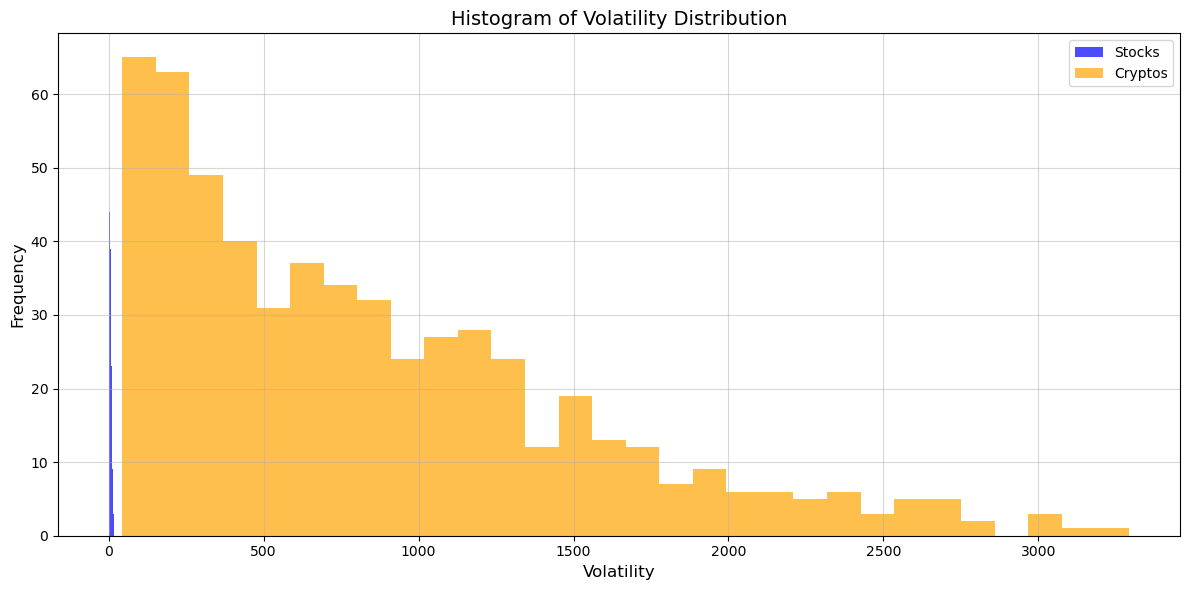

In [53]:
# Create histograms for volatility
plt.figure(figsize=(12, 6))

# Histogram for stocks
plt.hist(
    data['Stocks_Avg_Volatility'].dropna(),
    bins=30,
    alpha=0.7,
    label='Stocks',
    color='blue'
)

# Histogram for cryptocurrencies
plt.hist(
    data['Cryptos_Avg_Volatility'].dropna(),
    bins=30,
    alpha=0.7,
    label='Cryptos',
    color='orange'
)

# Add labels, title, and legend
plt.title('Histogram of Volatility Distribution', fontsize=14)
plt.xlabel('Volatility', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


### 3.3: Trading Activity

- **Purpose**:  
  To analyse the trading activity of stocks and cryptocurrencies by comparing their trading volumes.

- **Subsections**:  
  1. **Time-Series Plot of Trading Volumes**:  
     Visualises trends in trading activity over time for both asset classes.
  2. **Bar Plot of Total Trading Volume**:  
     Provides a summary of the total trading volume for stocks and cryptocurrencies over the entire period.


#### 3.3.1: Time-Series Plot of Trading Volumes

- **Objective**:  
  Visualise and compare the trends in trading volumes of stocks and cryptocurrencies over time.

- **Plot Description**:  
  A dual-axis line plot displaying the trading volumes of stocks and cryptocurrencies over the entire period.

- **Insights to Extract**:  
  - Identify periods of heightened or reduced trading activity for each asset class.
  - Highlight differences in trading volume magnitudes between stocks and cryptocurrencies.


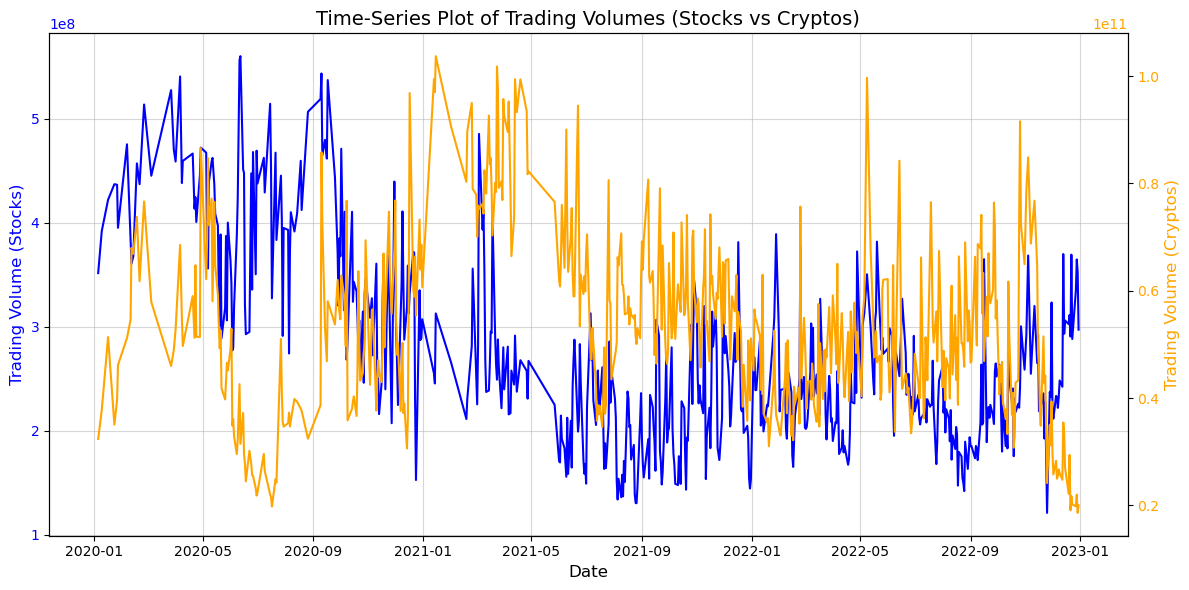

In [55]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Stocks on the primary y-axis
ax1.plot(data['Date'], data['Stocks_Total_Volume'], label='Stocks Total Volume', color='blue')
ax1.set_ylabel('Trading Volume (Stocks)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Cryptos on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(data['Date'], data['Cryptos_Total_Volume'], label='Cryptos Total Volume', color='orange')
ax2.set_ylabel('Trading Volume (Cryptos)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and x-axis label
plt.title('Time-Series Plot of Trading Volumes (Stocks vs Cryptos)', fontsize=14)
ax1.set_xlabel('Date', fontsize=12)

# Add grid and layout
ax1.grid(alpha=0.5)
fig.tight_layout()

# Show the plot
plt.show()


#### 3.3.2: Bar Plot of Total Trading Volume

- **Objective**:  
  Compare the total trading volumes of stocks and cryptocurrencies over the entire period.

- **Plot Description**:  
  A bar plot summarising the total trading volume for stocks and cryptocurrencies.

- **Insights to Extract**:  
  - Assess the relative magnitude of trading activity between the two asset classes.
  - Highlight any dominance in market activity by one asset class.


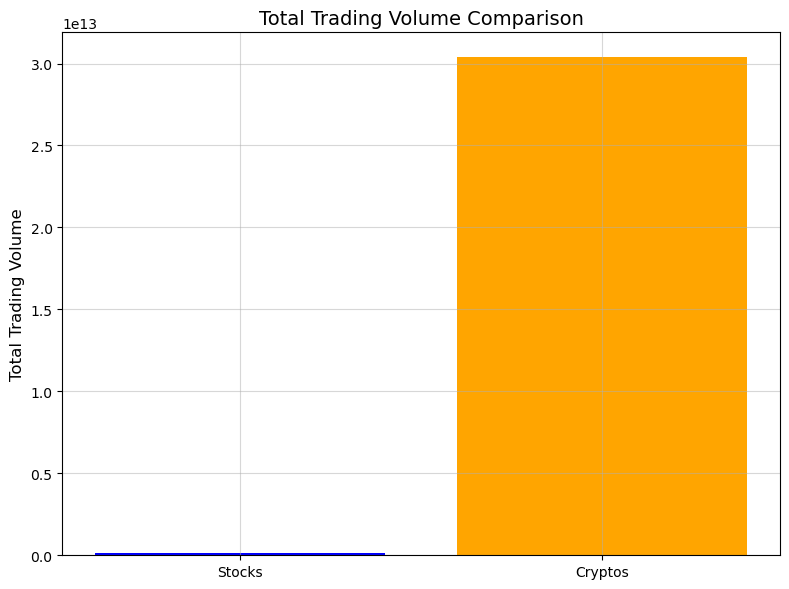

In [56]:
# Calculate total trading volume for stocks and cryptocurrencies
total_stocks_volume = data['Stocks_Total_Volume'].sum()
total_cryptos_volume = data['Cryptos_Total_Volume'].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Stocks', 'Cryptos'], [total_stocks_volume, total_cryptos_volume], color=['blue', 'orange'])

# Add labels, title, and grid
plt.title('Total Trading Volume Comparison', fontsize=14)
plt.ylabel('Total Trading Volume', fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


### 3.4: Interrelationship Between Metrics

- **Purpose**:  
  To explore the relationship between daily returns and volatility for stocks and cryptocurrencies, providing insights into their risk-return dynamics.

- **Subsections**:  
  1. **Scatter Plot of Returns vs. Volatility (Stocks)**:  
     Examines the risk-return trade-off for stocks.
  2. **Scatter Plot of Returns vs. Volatility (Cryptocurrencies)**:  
     Examines the risk-return trade-off for cryptocurrencies.
  3. **Combined Scatter Plot**:  
     Compares the risk-return dynamics of stocks and cryptocurrencies in a single plot.


#### 3.4.1: Scatter Plot of Returns vs. Volatility (Stocks)

- **Objective**:  
  Explore the relationship between daily returns and volatility for stocks.

- **Plot Description**:  
  A scatter plot with daily volatility on the x-axis and daily returns on the y-axis for stocks.

- **Insights to Extract**:  
  - Determine whether higher volatility corresponds to higher returns.
  - Assess the clustering of data points to understand typical risk-return combinations.


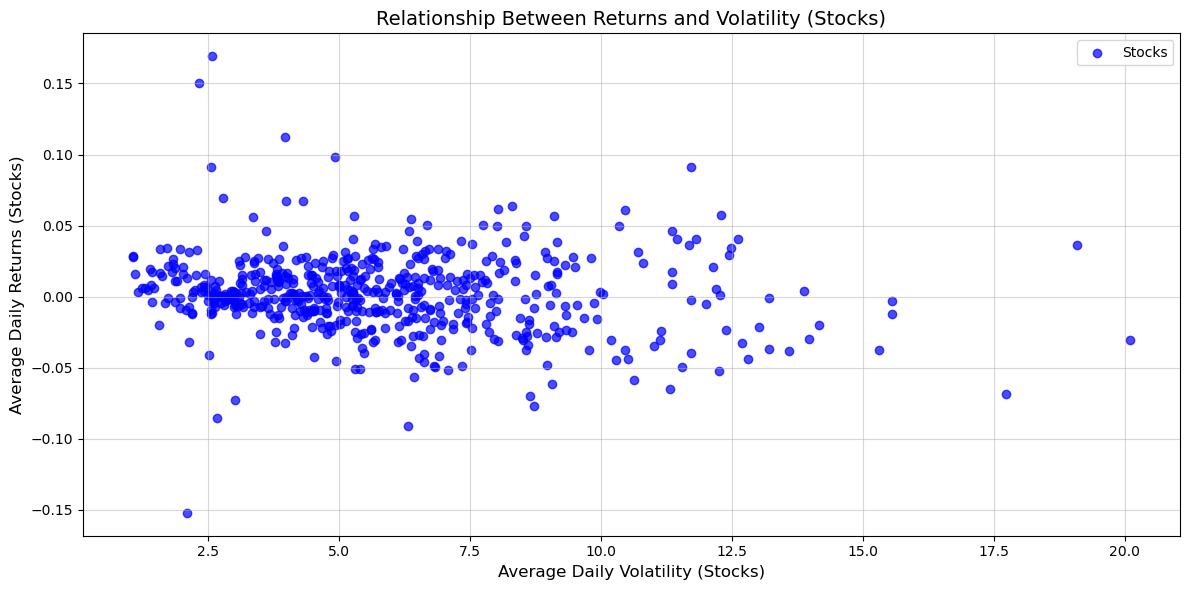

In [57]:
# Scatter plot for stocks
plt.figure(figsize=(12, 6))
plt.scatter(data['Stocks_Avg_Volatility'], data['Stocks_Avg_Return'], alpha=0.7, color='blue', label='Stocks')

# Add labels, title, and legend
plt.title('Relationship Between Returns and Volatility (Stocks)', fontsize=14)
plt.xlabel('Average Daily Volatility (Stocks)', fontsize=12)
plt.ylabel('Average Daily Returns (Stocks)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


#### 3.4.2: Scatter Plot of Returns vs. Volatility (Cryptocurrencies)

- **Objective**:  
  Explore the relationship between daily returns and volatility for cryptocurrencies.

- **Plot Description**:  
  A scatter plot with daily volatility on the x-axis and daily returns on the y-axis for cryptocurrencies.

- **Insights to Extract**:  
  - Determine whether higher volatility corresponds to higher returns.
  - Assess the clustering of data points to understand typical risk-return combinations.


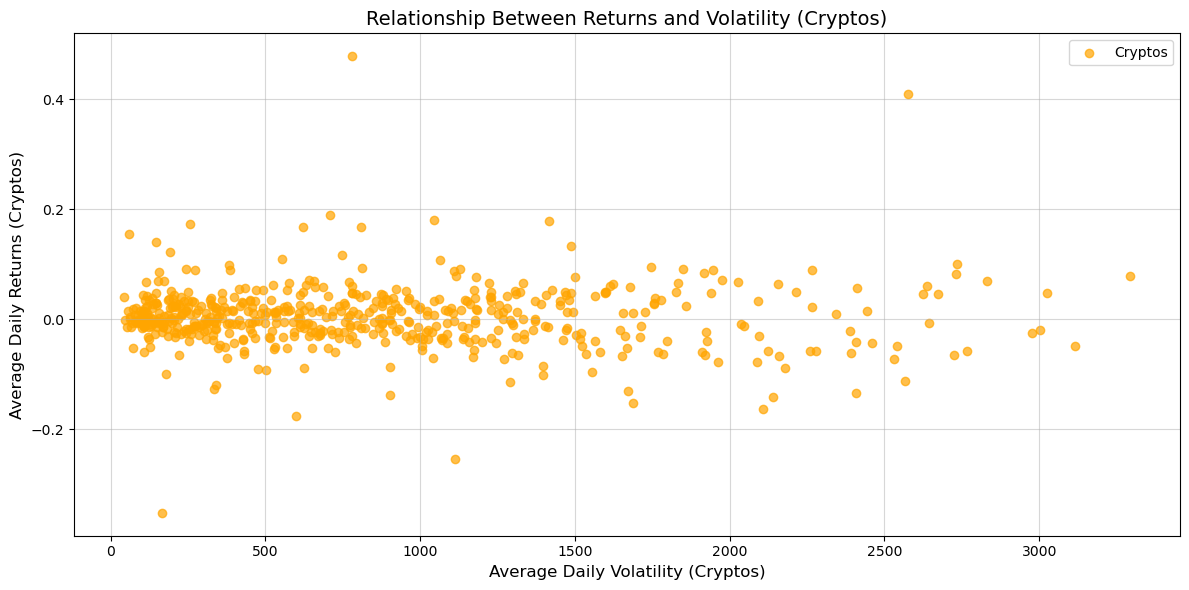

In [58]:
# Scatter plot for cryptocurrencies
plt.figure(figsize=(12, 6))
plt.scatter(data['Cryptos_Avg_Volatility'], data['Cryptos_Avg_Return'], alpha=0.7, color='orange', label='Cryptos')

# Add labels, title, and legend
plt.title('Relationship Between Returns and Volatility (Cryptos)', fontsize=14)
plt.xlabel('Average Daily Volatility (Cryptos)', fontsize=12)
plt.ylabel('Average Daily Returns (Cryptos)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


#### 3.4.3: Combined Scatter Plot

- **Objective**:  
  Compare the risk-return relationships of stocks and cryptocurrencies in a single visualisation.

- **Plot Description**:  
  A scatter plot with daily volatility on the x-axis and daily returns on the y-axis, with stocks and cryptocurrencies distinguished by colour.

- **Insights to Extract**:  
  - Compare the clustering of data points for stocks and cryptocurrencies.
  - Highlight differences in risk-return dynamics between the two asset classes.


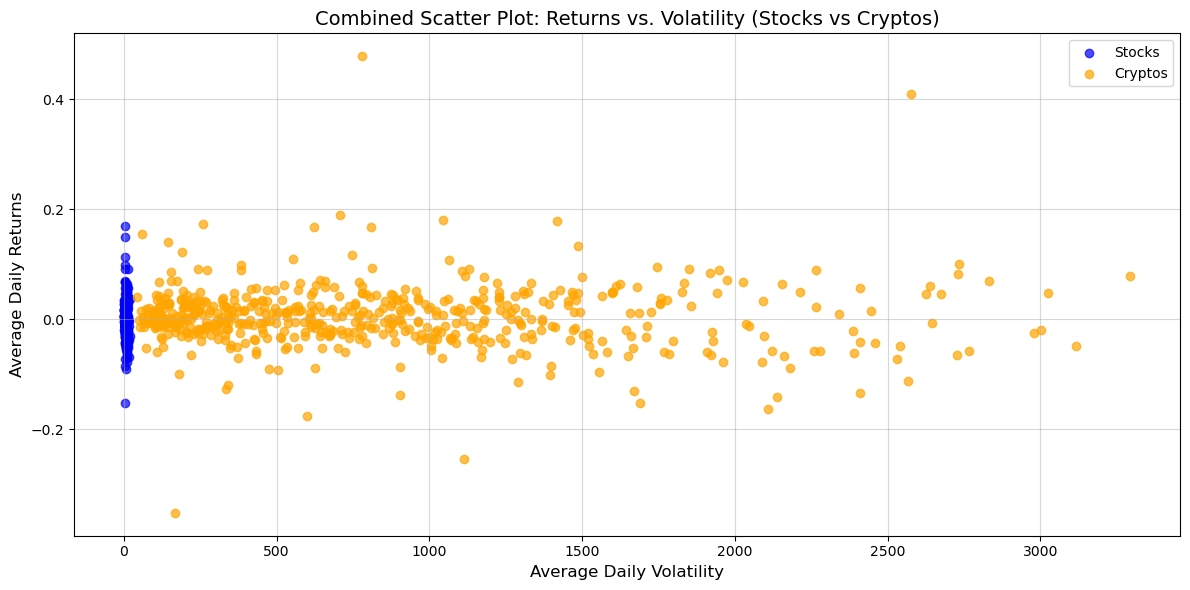

In [59]:
# Combined scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data['Stocks_Avg_Volatility'], data['Stocks_Avg_Return'], alpha=0.7, color='blue', label='Stocks')
plt.scatter(data['Cryptos_Avg_Volatility'], data['Cryptos_Avg_Return'], alpha=0.7, color='orange', label='Cryptos')

# Add labels, title, and legend
plt.title('Combined Scatter Plot: Returns vs. Volatility (Stocks vs Cryptos)', fontsize=14)
plt.xlabel('Average Daily Volatility', fontsize=12)
plt.ylabel('Average Daily Returns', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


### 3.5: Long-Term Trends

- **Purpose**:  
  To compare the cumulative performance of stocks and cryptocurrencies over the period by calculating the growth of $1 invested at the start.

- **Subsections**:  
  1. **Cumulative Return Plot**:  
     Visualises the growth of an initial $1 investment in stocks and cryptocurrencies over the entire period.

- **Insights to Extract**:  
  - Determine which asset class provides higher long-term returns.
  - Highlight periods of significant divergence or convergence in cumulative performance.


#### 3.5.1: Cumulative Return Plot

- **Objective**:  
  Compare the cumulative returns of stocks and cryptocurrencies over time, assuming an initial $1 investment.

- **Plot Description**:  
  A line plot showing the cumulative performance of $1 invested in stocks and cryptocurrencies. Cumulative returns are calculated as the compounded growth of daily returns over time.

- **Insights to Extract**:  
  - Identify which asset class shows better long-term growth.
  - Highlight periods where one asset class outperforms the other.


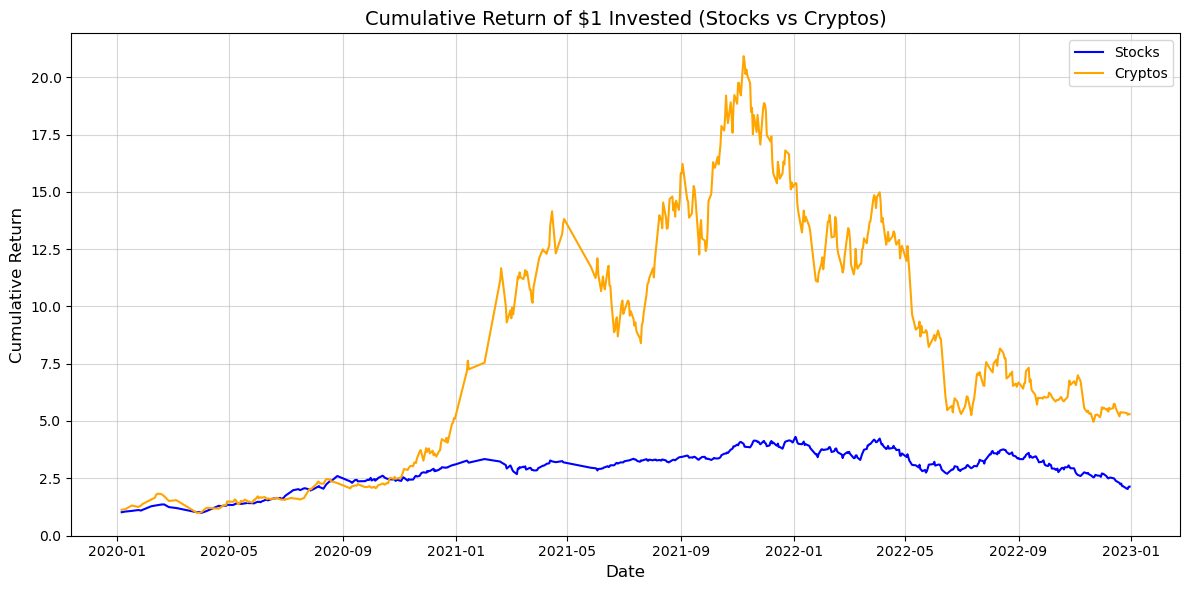

In [60]:
# Calculate cumulative returns for stocks and cryptocurrencies
data['Stocks_Cumulative_Return'] = (1 + data['Stocks_Avg_Return']).cumprod()
data['Cryptos_Cumulative_Return'] = (1 + data['Cryptos_Avg_Return']).cumprod()

# Create cumulative return plot
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Stocks_Cumulative_Return'], label='Stocks', color='blue')
plt.plot(data['Date'], data['Cryptos_Cumulative_Return'], label='Cryptos', color='orange')

# Add labels, title, and legend
plt.title('Cumulative Return of $1 Invested (Stocks vs Cryptos)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()
